In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
MergedDatasetsRenamed = pd.read_excel('../2progs/MergedDatasetwDummies.xlsx',sheet_name='Sheet1',index_col = 0)
Nonfood = pd.read_excel('../2progs/Nonfood.xlsx',sheet_name='Sheet1',index_col = 0)

In [72]:
#MergedDatasetsRenamed = pd.read_excel('../2progs/MergedDatasetsRenamed.xlsx',sheet_name='Sheet1',index_col = 0)

In [22]:
MergedDatasetsRenamed.head(5)

,hhid,s1q2_x,spend_tuitionfees,spend_textbooks,spend_exercisebooks,spend_schooluniform,spend_schoolboardingfees,spend_schooltransport,spend_extratuition,spend_PTA,...,hh_purchasedfood7d_No,hh_purchasedfood7d_Yes,childunder5_death5yrs_No,childunder5_death5yrs_Yes,childunder5_death5yrs_nan,foodwasfree_Don't Know,foodwasfree_No,foodwasfree_Refused to Respond,foodwasfree_Yes,foodwasfree_nan
0,10,Village 1,0.0,0.0,2400.0,0.0,6000.0,3000.0,2000.000061,0.0,...,0,1,1,0,0,0,0,0,1,0
1,10,Village 1,0.0,0.0,2400.0,0.0,6000.0,3000.0,2000.000061,0.0,...,0,1,1,0,0,0,0,0,1,0
2,10,Village 1,0.0,0.0,2400.0,0.0,6000.0,3000.0,2000.000061,0.0,...,0,1,1,0,0,0,0,0,1,0
3,10,Village 1,0.0,0.0,2400.0,0.0,6000.0,3000.0,2000.000061,0.0,...,0,1,1,0,0,0,0,0,1,0
4,10,Village 1,0.0,0.0,2400.0,0.0,6000.0,3000.0,2000.000061,0.0,...,0,1,1,0,0,0,0,0,1,0


In [31]:
Nonfood['cost_per_hh'] = pd.DataFrame(Nonfood.groupby('hhid')['cost'].sum())

In [32]:
MergedDatasetsRenamed['nonfoodTotalspend'] = Nonfood['cost_per_hh']

In [33]:
MergedDatasetsRenamed['energyTotalspend'] = MergedDatasetsRenamed[['totalcost_purchasedfirewood', 'totalcost_collectedfirewood', 
                                              'totalcost_farmresidue', 'totalcost_wood/processwaste', 
                                              'totalcost_charcoal','totalcost_kerosene/paraffin', 'totalcost_lpg', 
                                              'totalcost_electricity', 'totalcost_petrol', 'totalcost_diesel']].sum(axis = 1)

In [34]:
MergedDatasetsRenamed['foodTotalspend'] = MergedDatasetsRenamed['foodspent_localcurrecny']

In [35]:
MergedDatasetsRenamed['educationTotalspend'] = MergedDatasetsRenamed[['spend_tuitionfees', 'spend_textbooks', 
                                                           'spend_exercisebooks', 'spend_schooluniform', 
                                                           'spend_schoolboardingfees', 'spend_schooltransport', 
                                                           'spend_extratuition', 'spend_PTA', 'spend_pocketmoney', 
                                                           'spend_cautionmoney', 'spend_educmedicalfee', 
                                                           'spend_activityfees', 'spend_examfees', 
                                                           'spend_educfeedingprogram', 'spend_othereduccharges']].sum(axis = 1)

In [36]:
MergedDatasetsRenamed[['energyTotalspend', 'foodTotalspend','educationTotalspend', 'nonfoodTotalspend']].describe().T[['mean', 'std', 'count']].set_axis(['Energy Total Spend', 'Food Total Spend', 'Education Total Spend', 'Nonfood Total Spend'], axis = 'index').set_axis(['Mean', 'Std', 'N'], axis='columns')  

,Mean,Std,N
Energy Total Spend,383.242257,342.650045,18080.0
Food Total Spend,355.027789,441.010358,14826.0
Education Total Spend,2546.969193,8477.636666,18080.0
Nonfood Total Spend,566.227334,671.954678,1100.0


In [13]:
MergedDatasetsRenamed['educationTotalspend']

0        19100.000061
1        19100.000061
2        19100.000061
3        19100.000061
4        19100.000061
             ...     
18075     1000.000031
18076     1000.000031
18077     1000.000031
18078     1000.000031
18079     1000.000031
Name: educationTotalspend, Length: 18080, dtype: float64

In [ ]:
MergedDatasetsRenamed['foodTotalspend'] = MergedDatasetsRenamed[['spend_tuitionfees', 'spend_textbooks', 
                                                           'spend_exercisebooks', 'spend_schooluniform', 
                                                           'spend_schoolboardingfees', 'spend_schooltransport', 
                                                           'spend_extratuition', 'spend_PTA', 'spend_pocketmoney', 
                                                           'spend_cautionmoney', 'spend_educmedicalfee', 
                                                           'spend_activityfees', 'spend_examfees', 
                                                           'spend_educfeedingprogram', 'spend_othereduccharges']].sum(axis = 1)

In [4]:
Energy = pd.DataFrame(MergedDatasetsRenamed, columns= ['energyTotalspend', 'hhsize_x','s1q2_y', 
                                                       'totalcost_purchasedfirewood', 'totalcost_collectedfirewood',
                                                      'totalcost_farmresidue', 'totalcost_wood/processwaste', 
                                                       'totalcost_charcoal', 'totalcost_kerosene/paraffin', 
                                                       'totalcost_lpg', 'totalcost_electricity',
                                                      'totalcost_petrol', 'totalcost_diesel'])

In [5]:
Education =  pd.DataFrame(MergedDatasetsRenamed, columns= ['educationTotalspend','hhsize_x', 's1q2_y',
                                                           'spend_tuitionfees', 'spend_textbooks', 
                                                           'spend_exercisebooks','spend_schooluniform', 
                                                           'spend_schoolboardingfees', 'spend_schooltransport',
                                                           'spend_extratuition', 'spend_PTA', 'spend_pocketmoney', 
                                                           'spend_cautionmoney','spend_educmedicalfee', 
                                                           'spend_activityfees', 'spend_examfees', 
                                                           'spend_educfeedingprogram','spend_othereduccharges'])

In [6]:
Food2 = pd.DataFrame(MergedDatasetsRenamed, columns= ['s1q2','hh_purchasedfood7d', 'amountfood_purchased7d', 
                                                      'foodwasfree','foodspent_localcurrecny', 'foodconsumed7d',
                                                      'quantityfood_consumedkg_pc']) 
Food2

,s1q2,hh_purchasedfood7d,amountfood_purchased7d,foodwasfree,foodspent_localcurrecny,foodconsumed7d,quantityfood_consumedkg_pc
0,Village 1,Yes,24.0,Yes,1700.0,2.0,0.400000
1,Village 1,Yes,11.0,Yes,1150.0,1.0,0.200000
2,Village 1,Yes,2.0,Yes,240.0,7.0,0.392000
3,Village 1,Yes,400.0,Yes,200.0,10.0,0.002000
4,Village 1,Yes,1.0,Yes,100.0,1.0,0.100000
...,...,...,...,...,...,...,...
18075,Village 3,Yes,1.0,NaN,50.0,NaN,NaN
18076,Village 3,Yes,2.0,NaN,20.0,NaN,NaN
18077,Village 3,Yes,1.0,Yes,120.0,1.0,0.083333
18078,Village 3,Yes,1.0,No,10.0,1.0,0.166667


In [7]:
Household2 = pd.DataFrame(MergedDatasetsRenamed, columns= ["s1q2", "number_dwellings","number_habitablerooms", 
                          "floor_material", "roof_material", "wall_material",
                          "drikingwater_source", "drinkingwater_insufficientquanities", 
                          "toilet_type", "share_toilet", "lighting_source", 
                           "payrent_dwelling", "rentpaid_shillings", "own_radio",
                          "own_television", "own_satelitedish", "own_smartphone",
                          "own_refrigerator",  "own_table", "own_bed", "own_mattress", 
                         "own_mosquitonet", "own_fan", "own_bicycle", "own_motorcycle", 
                        "own_car", "own_generator", "own_solarpanels", "own_kerosenestove",
                          "own_charcoaljiko", "own_wheelbarrow","own_ironfencing", 
                          "own_farmanimals","relatives_abroad","relatives_outsidekenya", 
                          "own_bankaccount","borrowedfrom_sources12mo", "borrowedfrom_bank12mo", 
                          "borrowedfrom_community", "borrowedfrom_familyorfriends12mo", "remittances_abroad", 
                         "purchased_insurance", "childunder5_death5yrs", "sellhhgoods_lackfood", 
                           "healthandeduc_reduction",  "sellassets_lackfood",  "spendsavings:lackfood", 
                          "borrowmoneyfood_lackfood", "sellhouseland_lackfood", "withdrawchildrenschool_lackfood", 
                         "sellanimals:lackfood", "sellfemaleanimal_last", "beg_lackfood"]) 
Household2

,s1q2,number_dwellings,number_habitablerooms,floor_material,roof_material,wall_material,drikingwater_source,drinkingwater_insufficientquanities,toilet_type,share_toilet,...,sellhhgoods_lackfood,healthandeduc_reduction,sellassets_lackfood,spendsavings:lackfood,borrowmoneyfood_lackfood,sellhouseland_lackfood,withdrawchildrenschool_lackfood,sellanimals:lackfood,sellfemaleanimal_last,beg_lackfood
0,Village 1,2,2,Earth / Sand,Corrugated iron sheets,Plastic or tent material,Public tap / Stand pipe,Yes,Flush to somewhere else,Yes,...,Yes,No,Yes,No,Yes,No,No,No,No,No
1,Village 1,2,2,Earth / Sand,Corrugated iron sheets,Plastic or tent material,Public tap / Stand pipe,Yes,Flush to somewhere else,Yes,...,Yes,No,Yes,No,Yes,No,No,No,No,No
2,Village 1,2,2,Earth / Sand,Corrugated iron sheets,Plastic or tent material,Public tap / Stand pipe,Yes,Flush to somewhere else,Yes,...,Yes,No,Yes,No,Yes,No,No,No,No,No
3,Village 1,2,2,Earth / Sand,Corrugated iron sheets,Plastic or tent material,Public tap / Stand pipe,Yes,Flush to somewhere else,Yes,...,Yes,No,Yes,No,Yes,No,No,No,No,No
4,Village 1,2,2,Earth / Sand,Corrugated iron sheets,Plastic or tent material,Public tap / Stand pipe,Yes,Flush to somewhere else,Yes,...,Yes,No,Yes,No,Yes,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18075,Village 3,2,2,Earth / Sand,Corrugated iron sheets,Plastic or tent material,Public tap / Stand pipe,Yes,No facility / Bush / Field,NaN,...,No,No,No,No,No,No,No,No,No,No
18076,Village 3,2,2,Earth / Sand,Corrugated iron sheets,Plastic or tent material,Public tap / Stand pipe,Yes,No facility / Bush / Field,NaN,...,No,No,No,No,No,No,No,No,No,No
18077,Village 3,2,2,Earth / Sand,Corrugated iron sheets,Plastic or tent material,Public tap / Stand pipe,Yes,No facility / Bush / Field,NaN,...,No,No,No,No,No,No,No,No,No,No
18078,Village 3,2,2,Earth / Sand,Corrugated iron sheets,Plastic or tent material,Public tap / Stand pipe,Yes,No facility / Bush / Field,NaN,...,No,No,No,No,No,No,No,No,No,No


In [8]:
MergedDatasetsRenamed['energyTotalspend'] = Energy[['totalcost_purchasedfirewood', 'totalcost_collectedfirewood', 
                                              'totalcost_farmresidue', 'totalcost_wood/processwaste', 
                                              'totalcost_charcoal','totalcost_kerosene/paraffin', 'totalcost_lpg', 
                                              'totalcost_electricity', 'totalcost_petrol', 'totalcost_diesel']].sum(axis = 1)

In [9]:
#Food2['amountfood_purchased7d'] = np.where(Food2['amountfood_purchased7d'] > 80, 
                                          # 80,Food2['amountfood_purchased7d'])

#Food2['foodspent_localcurrecny'] = np.where(Food2['foodspent_localcurrecny'] > 600, 
                                                          #  600, Food2['foodspent_localcurrecny'])

MergedDatasetsRenamed[MergedDatasetsRenamed['hh_purchasedfood7d'] < 80]
                                                          

TypeError: '<' not supported between instances of 'str' and 'int'

In [10]:
#Food Spend Chart

MergedDatasetsRenamed[['hh_purchasedfood7d', 'amountfood_purchased7d','foodwasfree','foodspent_localcurrecny', 
               'foodconsumed7d','quantityfood_consumedkg_pc']].describe().T[['mean', 'std', 'count', 'min','max']]  

,mean,std,count,min,max
amountfood_purchased7d,43.201819,404.407432,14557.0,0.000000,40000.0
foodspent_localcurrecny,396.447658,553.982411,15074.0,0.000000,8500.0
foodconsumed7d,32.160851,170.127047,15379.0,0.002000,5000.0
quantityfood_consumedkg_pc,0.520312,0.795757,15498.0,0.000067,17.5


In [11]:
#Test outlier treatment 
#MergedDatasetsRenamed['spend_schoolboardingfees'].count()
#MergedDatasetsRenamed2 = MergedDatasetsRenamed[MergedDatasetsRenamed['spend_schoolboardingfees']<50000]
#MergedDatasetsRenamed2['spend_schoolboardingfees'].count()
#18080 switch to 18016

In [12]:
#Outlier Treatment 
#MergedDatasetsRenamed['spend_schoolboardingfees'] = np.where(MergedDatasetsRenamed['spend_schoolboardingfees'] > 50000, 
                                                          # 50000,MergedDatasetsRenamed['spend_schoolboardingfees'])

In [13]:
#Outlier Treatment 
MergedDatasetsRenamed['spend_schooltransport'] = np.where(MergedDatasetsRenamed['spend_schoolboardingfees'] > 50000, 
                                                           50000,MergedDatasetsRenamed['spend_schoolboardingfees'])

In [14]:
#Outlier Treatment
MergedDatasetsRenamed['spend_educfeedingprogram'] = np.where(MergedDatasetsRenamed['spend_educfeedingprogram'] > 20000, 
                                                           20000,MergedDatasetsRenamed['spend_educfeedingprogram'])

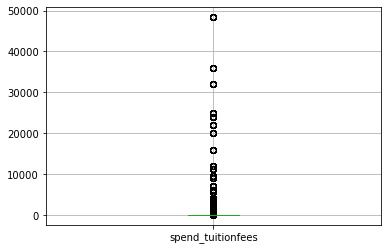

In [15]:
MergedDatasetsRenamed.boxplot(column=['spend_tuitionfees'])

In [16]:
MergedDatasetsRenamed['educationTotalspend'] = Education[['spend_tuitionfees', 'spend_textbooks', 
                                                           'spend_exercisebooks', 'spend_schooluniform', 
                                                           'spend_schoolboardingfees', 'spend_schooltransport', 
                                                           'spend_extratuition', 'spend_PTA', 'spend_pocketmoney', 
                                                           'spend_cautionmoney', 'spend_educmedicalfee', 
                                                           'spend_activityfees', 'spend_examfees', 
                                                           'spend_educfeedingprogram', 'spend_othereduccharges']].sum(axis = 1)


In [17]:
#Test Outlier Treatment
#Food2['amountfood_purchased7d'] = Food2[Food2['amountfood_purchased7d']<80]



In [18]:
#Outlier Treatment 
#MergedDatasetsRenamed['amountfood_purchased7d'] = np.where(MergedDatasetsRenamed['amountfood_purchased7d'] > 80, 
                                                           #80,MergedDatasetsRenamed['amountfood_purchased7d'])

In [19]:
#Test Outlier Treatment
#Food2['foodspent_localcurrecny'] = Food2[Food2['foodspent_localcurrecny']<600]



In [20]:
#Outlier Treatment
#MergedDatasetsRenamed['foodspent_localcurrecny'] = np.where(MergedDatasetsRenamed['foodspent_localcurrecny'] > 600, 
                                                            #600, MergedDatasetsRenamed['foodspent_localcurrecny'])

In [21]:
#Total Spend Chart
MergedDatasetsRenamed[['energyTotalspend', 'educationTotalspend', 'amountfood_purchased7d', 
                       'foodspent_localcurrecny']].describe().T[['mean', 'std', 'count']].set_axis(['Energy Total Spend', 'Education Total Spend', 'Total Food Purchased - Past 7 Days', 'Total Food Spend Local Currency'], axis = 'index').set_axis(['Mean', 'Std', 'N'], axis='columns')                  

,Mean,Std,N
Energy Total Spend,420.645465,427.067660,18080.0
Education Total Spend,3128.881253,10941.026654,18080.0
Total Food Purchased - Past 7 Days,43.201819,404.407432,14557.0
Total Food Spend Local Currency,396.447658,553.982411,15074.0


In [22]:
#Energy Spend Chart
Energy[['totalcost_purchasedfirewood', 'totalcost_collectedfirewood',
                                                      'totalcost_farmresidue', 'totalcost_wood/processwaste', 
                                                       'totalcost_charcoal', 'totalcost_kerosene/paraffin', 
                                                      'totalcost_diesel']].describe().T[['mean', 'std', 'count']].set_axis(['Total Cost Purchased Firewood', 'Total Cost Collected Firewood', 'Total Cost Farm Residue', 'Total Cost Wood/Process Waste', 'Total Cost Charcoal', 'Total Cost Kerosene/Paraffin', 'Total Cost Diesel'], axis = 'index').set_axis(['Mean', 'Std', 'N'], axis='columns')                      

#didn't include 'totalcost_electricity', 'totalcost_lpg	' and 'totalcost_petrol' because there were no values

,Mean,Std,N
Total Cost Purchased Firewood,242.258923,218.895053,8265.0
Total Cost Collected Firewood,265.786892,359.102628,5218.0
Total Cost Farm Residue,72.012579,164.287122,318.0
Total Cost Wood/Process Waste,66.403941,118.761716,406.0
Total Cost Charcoal,365.445725,256.824298,11193.0
Total Cost Kerosene/Paraffin,666.936937,562.106093,111.0
Total Cost Diesel,100.000000,0.000000,18.0


In [23]:
Food2['amountfood_purchased7d'] = np.where(Food2['amountfood_purchased7d'] > 80, 
                                           80,Food2['amountfood_purchased7d'])

Food2['foodspent_localcurrecny'] = np.where(Food2['foodspent_localcurrecny'] > 600, 
                                                            600, Food2['foodspent_localcurrecny'])

In [24]:
#Food Spend Chart

Food2[['hh_purchasedfood7d', 'amountfood_purchased7d','foodwasfree','foodspent_localcurrecny', 
               'foodconsumed7d','quantityfood_consumedkg_pc']].describe().T[['mean', 'std', 'count', 'min','max']]  

,mean,std,count,min,max
amountfood_purchased7d,11.670734,20.713846,14557.0,0.000000,80.0
foodspent_localcurrecny,258.829110,220.309334,15074.0,0.000000,600.0
foodconsumed7d,32.160851,170.127047,15379.0,0.002000,5000.0
quantityfood_consumedkg_pc,0.520312,0.795757,15498.0,0.000067,17.5


In [25]:
Education['spend_tuitionfees'] = np.where(Education['spend_tuitionfees'] > 10000, 
                                                            100000, Education['spend_tuitionfees'])

In [26]:
Education['spend_schoolboardingfees'] = np.where(Education['spend_schoolboardingfees'] > 50000, 
                                                            50000, Education['spend_schoolboardingfees'])
#replacing rather than dropping

In [27]:
Education[Education['spend_schoolboardingfees']<100000]['spend_schoolboardingfees'].count()
#dropping 80-32 observations

18080

In [28]:
Education[Education['spend_tuitionfees']<10000]['spend_tuitionfees'].count()

17838

In [29]:
#Education Spend Chart

Education[['spend_tuitionfees', 'spend_textbooks', 'spend_exercisebooks','spend_schooluniform', 
           'spend_schoolboardingfees', 'spend_schooltransport','spend_extratuition', 
           'spend_PTA', 'spend_pocketmoney', 'spend_cautionmoney','spend_educmedicalfee', 
           'spend_activityfees', 'spend_examfees', 'spend_educfeedingprogram','spend_othereduccharges']].describe().T[['mean', 'std', 'count', 'min', 'max']]

#total spend per household---aggregate spend (or divide by number of people---per person)
#outlier dropping on total

,mean,std,count,min,max
spend_tuitionfees,1499.909292,11507.807851,18080.0,0.0,100000.000000
spend_textbooks,274.443437,844.785915,18080.0,0.0,9999.999878
spend_exercisebooks,496.192368,922.513144,18080.0,0.0,8600.000000
spend_schooluniform,300.406527,1039.178863,18080.0,0.0,14000.000000
spend_schoolboardingfees,386.376752,3574.201420,18080.0,0.0,50000.000000
spend_schooltransport,355.359513,3207.206623,18080.0,0.0,72000.000000
spend_extratuition,40.931785,372.584012,18080.0,0.0,6000.000000
spend_PTA,19.302378,133.270265,18080.0,0.0,3000.000000
spend_pocketmoney,179.688606,1478.585277,18080.0,0.0,36000.000000
spend_cautionmoney,23.753208,250.418506,18080.0,0.0,5000.000000


In [30]:
Education.groupby('hhsize_x')['spend_textbooks'].mean()

hhsize_x
1      113.402985
2      125.517522
3      126.702998
4       79.578361
5      297.049139
6      143.254365
7      339.972298
8      405.266347
9      363.944633
10     739.690599
11     611.244546
12     789.158366
13     853.448281
14    1168.852480
15     247.000001
17       0.000000
19       0.000000
21     199.999998
Name: spend_textbooks, dtype: float64

In [35]:
Education.groupby('hhsize_x')['hhsize_x'].count()

hhsize_x
1     1541
2     1227
3     1101
4     2514
5     2571
6     2482
7     1805
8     1652
9     1156
10     724
11     458
12     301
13     203
14     183
15     100
17      23
19      11
21      28
Name: hhsize_x, dtype: int64

In [36]:
Education.groupby('s1q2')['spend_textbooks'].mean()

#village 1 spends more on textbooks, village 3 spends significantly less on textbooks

KeyError: 's1q2'

In [37]:
Education.groupby('s1q2')['spend_tuitionfees'].mean()
#village 2 spends the most on tuition fees, village 3 still spends significantly less

KeyError: 's1q2'

In [38]:
Education.isnull().sum()

#no missing values

educationTotalspend         18080
hhsize_x                        0
s1q2_y                          0
spend_tuitionfees               0
spend_textbooks                 0
spend_exercisebooks             0
spend_schooluniform             0
spend_schoolboardingfees        0
spend_schooltransport           0
spend_extratuition              0
spend_PTA                       0
spend_pocketmoney               0
spend_cautionmoney              0
spend_educmedicalfee            0
spend_activityfees              0
spend_examfees                  0
spend_educfeedingprogram        0
spend_othereduccharges          0
dtype: int64

In [39]:
sns.lmplot(x='spend_exercisebooks',y='spend_tuitionfees',data=Education, fit_reg = False, hue = 's1q2')

KeyError: "['s1q2'] not in index"

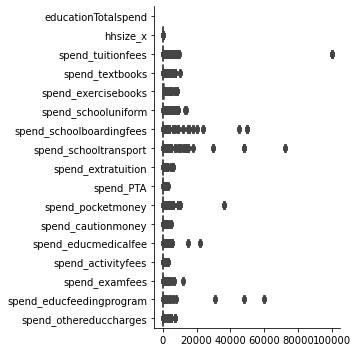

In [40]:
sns.catplot(data=Education, orient="h", kind="box")

#tuition fees, boarding, transport are significant spend

In [41]:
Energy.isnull().sum()

#a lot of null values in energy dataset

energyTotalspend               18080
hhsize_x                           0
s1q2_y                             0
totalcost_purchasedfirewood     9815
totalcost_collectedfirewood    12862
totalcost_farmresidue          17762
totalcost_wood/processwaste    17674
totalcost_charcoal              6887
totalcost_kerosene/paraffin    17969
totalcost_lpg                  18033
totalcost_electricity          18080
totalcost_petrol               18080
totalcost_diesel               18062
dtype: int64

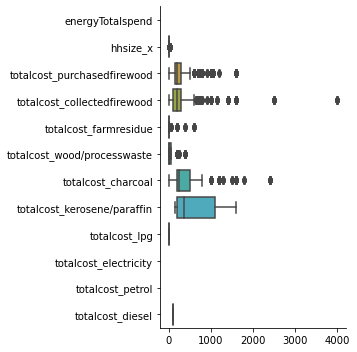

In [42]:
sns.catplot(data=Energy, orient="h", kind="box")

In [43]:
Energy.groupby('s1q2_y')['totalcost_kerosene/paraffin'].mean()

#no information on total cost of kerosene/paraffin for village 3
#village 1 spends significantly more than village 2 on kerosene

s1q2_y
Village 1    1600.000000
Village 2     352.168675
Village 3            NaN
Name: totalcost_kerosene/paraffin, dtype: float64

In [44]:
Energy.groupby('s1q2_y')['totalcost_charcoal'].mean()
#spend evenly distributed across villages

s1q2_y
Village 1    375.412142
Village 2    356.486635
Village 3    362.010003
Name: totalcost_charcoal, dtype: float64

In [45]:
Energy.groupby('s1q2_y')['totalcost_purchasedfirewood'].mean()
#spend evenly distributed across villages

s1q2_y
Village 1    247.498587
Village 2    239.116486
Village 3    237.752684
Name: totalcost_purchasedfirewood, dtype: float64

In [46]:
Food2 = pd.DataFrame(MergedDatasetsRenamed, columns= ['s1q2','hh_purchasedfood7d', 'amountfood_purchased7d', 
                                                      'foodwasfree','foodspent_localcurrecny', 'foodconsumed7d',
                                                     'quantityfood_consumedkg_pc']) 
Food2

,s1q2,hh_purchasedfood7d,amountfood_purchased7d,foodwasfree,foodspent_localcurrecny,foodconsumed7d,quantityfood_consumedkg_pc
0,Village 1,Yes,24.0,Yes,1700.0,2.0,0.400000
1,Village 1,Yes,11.0,Yes,1150.0,1.0,0.200000
2,Village 1,Yes,2.0,Yes,240.0,7.0,0.392000
3,Village 1,Yes,400.0,Yes,200.0,10.0,0.002000
4,Village 1,Yes,1.0,Yes,100.0,1.0,0.100000
...,...,...,...,...,...,...,...
18075,Village 3,Yes,1.0,NaN,50.0,NaN,NaN
18076,Village 3,Yes,2.0,NaN,20.0,NaN,NaN
18077,Village 3,Yes,1.0,Yes,120.0,1.0,0.083333
18078,Village 3,Yes,1.0,No,10.0,1.0,0.166667


In [47]:
Food2.describe()

,amountfood_purchased7d,foodspent_localcurrecny,foodconsumed7d,quantityfood_consumedkg_pc
count,14557.000000,15074.000000,15379.000000,15498.000000
mean,43.201819,396.447658,32.160851,0.520312
std,404.407432,553.982411,170.127047,0.795757
min,0.000000,0.000000,0.002000,0.000067
25%,1.000000,60.000000,1.000000,0.116667
50%,3.000000,195.000000,2.000000,0.262500
75%,10.000000,500.000000,5.000000,0.625000
max,40000.000000,8500.000000,5000.000000,17.500000


In [48]:
#A ton of missing variables that will need to be cleaned 
Food2.isnull().sum()

s1q2                           123
hh_purchasedfood7d               0
amountfood_purchased7d        3523
foodwasfree                   2582
foodspent_localcurrecny       3006
foodconsumed7d                2701
quantityfood_consumedkg_pc    2582
dtype: int64

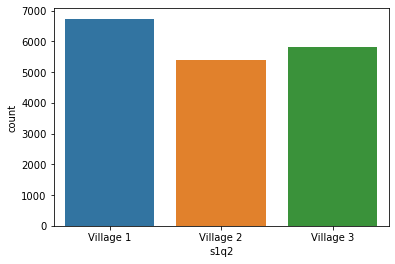

In [49]:
#Different villages and population 
sns.countplot(x="s1q2", data= Food2)

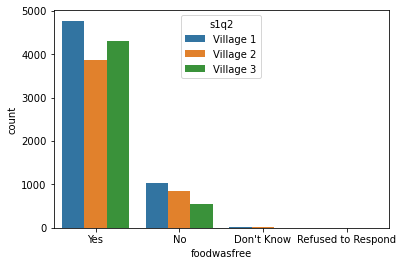

In [50]:
#Village and if food was free which makes sense given the pop in each village 
sns.countplot(x="foodwasfree", hue="s1q2", data= Food2)

In [51]:
#Count of food was free and village 
Food2.groupby('s1q2')['foodwasfree'].count()

s1q2
Village 1    5823
Village 2    4734
Village 3    4840
Name: foodwasfree, dtype: int64

In [52]:
#Amount Spent on food by village using local currency
Food2.groupby('s1q2')['foodspent_localcurrecny'].mean()

s1q2
Village 1    353.817565
Village 2    396.826923
Village 3    435.119354
Name: foodspent_localcurrecny, dtype: float64

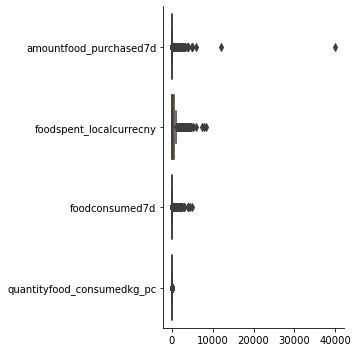

In [53]:
#Box plot that basically shows nothing. Need to get rid of that outlier? 
sns.catplot(data=Food2, orient="h", kind="box")

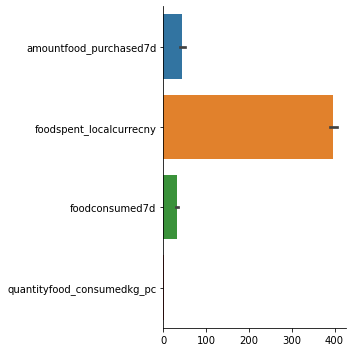

In [54]:
#Count of numeric variables 
sns.catplot(data= Food2,orient="h", kind="bar")

In [55]:
Household2 = pd.DataFrame(MergedDatasetsRenamed, columns= ["s1q2", "number_dwellings","number_habitablerooms", 
                          "floor_material", "roof_material", "wall_material",
                          "drikingwater_source", "drinkingwater_insufficientquanities", 
                          "toilet_type", "share_toilet", "lighting_source", 
                           "payrent_dwelling", "rentpaid_shillings", "own_radio",
                          "own_television", "own_satelitedish", "own_smartphone",
                          "own_refrigerator",  "own_table", "own_bed", "own_mattress", 
                         "own_mosquitonet", "own_fan", "own_bicycle", "own_motorcycle", 
                        "own_car", "own_generator", "own_solarpanels", "own_kerosenestove",
                          "own_charcoaljiko", "own_wheelbarrow","own_ironfencing", 
                          "own_farmanimals","relatives_abroad","relatives_outsidekenya", 
                          "own_bankaccount","borrowedfrom_sources12mo", "borrowedfrom_bank12mo", 
                          "borrowedfrom_community", "borrowedfrom_familyorfriends12mo", "remittances_abroad", 
                         "purchased_insurance", "childunder5_death5yrs", "sellhhgoods_lackfood", 
                           "healthandeduc_reduction",  "sellassets_lackfood",  "spendsavings:lackfood", 
                          "borrowmoneyfood_lackfood", "sellhouseland_lackfood", "withdrawchildrenschool_lackfood", 
                         "sellanimals:lackfood", "sellfemaleanimal_last", "beg_lackfood"]) 
Household2

,s1q2,number_dwellings,number_habitablerooms,floor_material,roof_material,wall_material,drikingwater_source,drinkingwater_insufficientquanities,toilet_type,share_toilet,...,sellhhgoods_lackfood,healthandeduc_reduction,sellassets_lackfood,spendsavings:lackfood,borrowmoneyfood_lackfood,sellhouseland_lackfood,withdrawchildrenschool_lackfood,sellanimals:lackfood,sellfemaleanimal_last,beg_lackfood
0,Village 1,2,2,Earth / Sand,Corrugated iron sheets,Plastic or tent material,Public tap / Stand pipe,Yes,Flush to somewhere else,Yes,...,Yes,No,Yes,No,Yes,No,No,No,No,No
1,Village 1,2,2,Earth / Sand,Corrugated iron sheets,Plastic or tent material,Public tap / Stand pipe,Yes,Flush to somewhere else,Yes,...,Yes,No,Yes,No,Yes,No,No,No,No,No
2,Village 1,2,2,Earth / Sand,Corrugated iron sheets,Plastic or tent material,Public tap / Stand pipe,Yes,Flush to somewhere else,Yes,...,Yes,No,Yes,No,Yes,No,No,No,No,No
3,Village 1,2,2,Earth / Sand,Corrugated iron sheets,Plastic or tent material,Public tap / Stand pipe,Yes,Flush to somewhere else,Yes,...,Yes,No,Yes,No,Yes,No,No,No,No,No
4,Village 1,2,2,Earth / Sand,Corrugated iron sheets,Plastic or tent material,Public tap / Stand pipe,Yes,Flush to somewhere else,Yes,...,Yes,No,Yes,No,Yes,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18075,Village 3,2,2,Earth / Sand,Corrugated iron sheets,Plastic or tent material,Public tap / Stand pipe,Yes,No facility / Bush / Field,NaN,...,No,No,No,No,No,No,No,No,No,No
18076,Village 3,2,2,Earth / Sand,Corrugated iron sheets,Plastic or tent material,Public tap / Stand pipe,Yes,No facility / Bush / Field,NaN,...,No,No,No,No,No,No,No,No,No,No
18077,Village 3,2,2,Earth / Sand,Corrugated iron sheets,Plastic or tent material,Public tap / Stand pipe,Yes,No facility / Bush / Field,NaN,...,No,No,No,No,No,No,No,No,No,No
18078,Village 3,2,2,Earth / Sand,Corrugated iron sheets,Plastic or tent material,Public tap / Stand pipe,Yes,No facility / Bush / Field,NaN,...,No,No,No,No,No,No,No,No,No,No


In [56]:
Household2.describe()

,number_dwellings,number_habitablerooms,rentpaid_shillings
count,18080.000000,18080.000000,18080.0
mean,1.322400,1.398451,0.0
std,0.557136,0.667266,0.0
min,1.000000,1.000000,0.0
25%,1.000000,1.000000,0.0
50%,1.000000,1.000000,0.0
75%,2.000000,2.000000,0.0
max,4.000000,6.000000,0.0


In [57]:
#Only 3 variables have missing values 
Household2.isnull().sum()

s1q2                                    123
number_dwellings                          0
number_habitablerooms                     0
floor_material                            0
roof_material                             0
wall_material                             0
drikingwater_source                       0
drinkingwater_insufficientquanities       0
toilet_type                               0
share_toilet                           6931
lighting_source                           0
payrent_dwelling                          0
rentpaid_shillings                        0
own_radio                                 0
own_television                            0
own_satelitedish                          0
own_smartphone                            0
own_refrigerator                          0
own_table                                 0
own_bed                                   0
own_mattress                              0
own_mosquitonet                           0
own_fan                         

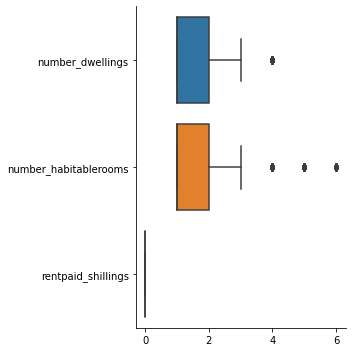

In [58]:
#box plot of numeric values 
sns.catplot(data= Household2, orient="h", kind="box")

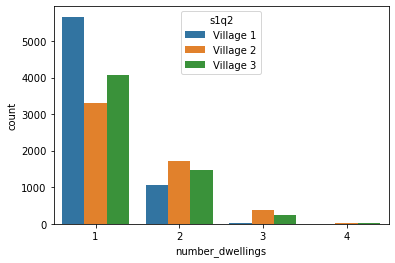

In [59]:
#Example of begging for food based on village 
sns.countplot(x="number_dwellings", hue="s1q2", data= Household2)

In [60]:
#Mean of number of dwellings and village 
Household2.groupby('s1q2')['number_dwellings'].mean()

s1q2
Village 1    1.164713
Village 2    1.464854
Village 3    1.352202
Name: number_dwellings, dtype: float64

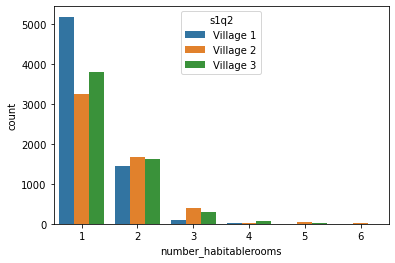

In [61]:
#Graph count of habitable rooms and village 
sns.countplot(x="number_habitablerooms", hue="s1q2", data= Household2)

In [62]:
#Mean of habitable rooms and village 
Household2.groupby('s1q2')['number_habitablerooms'].mean()

s1q2
Village 1    1.251373
Village 2    1.528117
Village 3    1.428424
Name: number_habitablerooms, dtype: float64

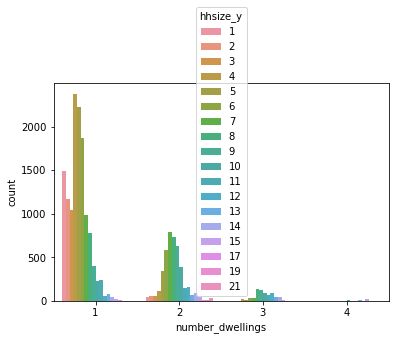

In [63]:
#Kept this just to see how I can altewr it. It is very hard to visualize 
sns.countplot(x="number_dwellings", hue="hhsize_y", data= MergedDatasetsRenamed)

In [64]:
#Mean of household size and villagge
MergedDatasetsRenamed.groupby('hhsize_y')['number_dwellings'].mean()

hhsize_y
1     1.029202
2     1.046455
3     1.054496
4     1.062053
5     1.141190
6     1.258259
7     1.472576
8     1.607143
9     1.755190
10    1.846685
11    1.611354
12    2.112957
13    1.926108
14    2.010929
15    2.260000
17    1.521739
19    2.000000
21    2.000000
Name: number_dwellings, dtype: float64

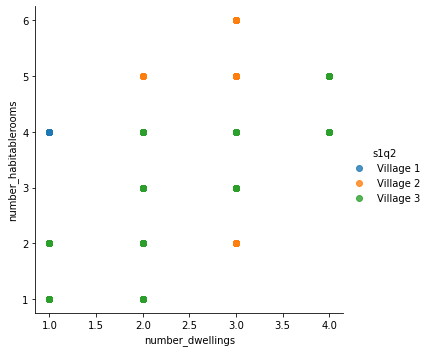

In [65]:
sns.lmplot(x='number_dwellings', y='number_habitablerooms',data= Household2, fit_reg = False, hue = 's1q2')

In [66]:
#Creating Dummy Variables for HH 
Dummies= pd.get_dummies(MergedDatasetsRenamed, columns=["own_radio",
                          "own_television", "drinkingwater_insufficientquanities", "own_satelitedish", "own_smartphone",
                          "own_refrigerator",  "own_table", "own_bed", "own_mattress", 
                         "own_mosquitonet", "own_fan", "own_bicycle", "own_motorcycle", 
                        "own_car", "own_generator", "own_solarpanels", "own_kerosenestove",
                          "own_charcoaljiko", "own_wheelbarrow","own_ironfencing", 
                          "own_farmanimals","relatives_abroad","relatives_outsidekenya", 
                          "own_bankaccount","borrowedfrom_sources12mo", "borrowedfrom_bank12mo", 
                          "borrowedfrom_community", "borrowedfrom_familyorfriends12mo", "remittances_abroad", 
                         "purchased_insurance", "childunder5_death5yrs", "sellhhgoods_lackfood", 
                           "healthandeduc_reduction",  "sellassets_lackfood",  "spendsavings:lackfood", 
                          "borrowmoneyfood_lackfood", "sellhouseland_lackfood", "withdrawchildrenschool_lackfood", 
                         "sellanimals:lackfood", "sellfemaleanimal_last", "beg_lackfood", "payrent_dwelling", 
                        "hh_purchasedfood7d", 'foodwasfree'])
Dummies

,hhid,s1q2_x,spend_tuitionfees,spend_textbooks,spend_exercisebooks,spend_schooluniform,spend_schoolboardingfees,spend_schooltransport,spend_extratuition,spend_PTA,...,sellfemaleanimal_last_Yes,beg_lackfood_No,beg_lackfood_Yes,payrent_dwelling_No,hh_purchasedfood7d_No,hh_purchasedfood7d_Yes,foodwasfree_Don't Know,foodwasfree_No,foodwasfree_Refused to Respond,foodwasfree_Yes
0,10,Village 1,0.0,0.0,2400.000000,0.0,6000.0,6000.0,2000.000061,0.0,...,0,1,0,1,0,1,0,0,0,1
1,10,Village 1,0.0,0.0,2400.000000,0.0,6000.0,6000.0,2000.000061,0.0,...,0,1,0,1,0,1,0,0,0,1
2,10,Village 1,0.0,0.0,2400.000000,0.0,6000.0,6000.0,2000.000061,0.0,...,0,1,0,1,0,1,0,0,0,1
3,10,Village 1,0.0,0.0,2400.000000,0.0,6000.0,6000.0,2000.000061,0.0,...,0,1,0,1,0,1,0,0,0,1
4,10,Village 1,0.0,0.0,2400.000000,0.0,6000.0,6000.0,2000.000061,0.0,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18075,6004,Village 3,0.0,0.0,1000.000031,0.0,0.0,0.0,0.000000,0.0,...,0,1,0,1,0,1,0,0,0,0
18076,6004,Village 3,0.0,0.0,1000.000031,0.0,0.0,0.0,0.000000,0.0,...,0,1,0,1,0,1,0,0,0,0
18077,6004,Village 3,0.0,0.0,1000.000031,0.0,0.0,0.0,0.000000,0.0,...,0,1,0,1,0,1,0,0,0,1
18078,6004,Village 3,0.0,0.0,1000.000031,0.0,0.0,0.0,0.000000,0.0,...,0,1,0,1,0,1,0,1,0,0


In [67]:
#Description of Dummies
Dummies.describe()

,hhid,spend_tuitionfees,spend_textbooks,spend_exercisebooks,spend_schooluniform,spend_schoolboardingfees,spend_schooltransport,spend_extratuition,spend_PTA,spend_pocketmoney,...,sellfemaleanimal_last_Yes,beg_lackfood_No,beg_lackfood_Yes,payrent_dwelling_No,hh_purchasedfood7d_No,hh_purchasedfood7d_Yes,foodwasfree_Don't Know,foodwasfree_No,foodwasfree_Refused to Respond,foodwasfree_Yes
count,18080.000000,18080.000000,18080.000000,18080.000000,18080.000000,18080.000000,18080.000000,18080.000000,18080.000000,18080.000000,...,18080.000000,18080.000000,18080.000000,18080.0,18080.000000,18080.000000,18080.000000,18080.000000,18080.000000,18080.000000
mean,2881.083075,483.579096,274.443437,496.192368,300.406527,519.651088,386.376752,40.931785,19.302378,179.688606,...,0.044580,0.866372,0.133628,1.0,0.159624,0.840376,0.001217,0.135288,0.000221,0.720465
std,1711.899022,3112.086816,844.785915,922.513144,1039.178863,5716.036337,3574.201420,372.584012,133.270265,1478.585277,...,0.206385,0.340262,0.340262,0.0,0.366267,0.366267,0.034863,0.342040,0.014873,0.448783
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1404.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2801.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,4397.000000,0.000000,0.000000,600.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,6004.000000,48350.000980,9999.999878,8600.000000,14000.000000,100200.000000,50000.000000,6000.000000,3000.000000,36000.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
Household2[["number_dwellings","number_habitablerooms"]].describe().T[['mean', 'std', 'count']] 

,mean,std,count
number_dwellings,1.322400,0.557136,18080.0
number_habitablerooms,1.398451,0.667266,18080.0


In [74]:
Nonfood = pd.read_csv('../1data/KSPS/UNHCR-KEN-2018-SEA-Kalobeyei-Nonfood.csv') 

In [75]:
Nonfood = Nonfood.rename(columns={
                        "s12q9":"purchased", 
                        "s12q10": "cost"})

In [78]:
Nonfood.describe()

,hhid,hhsize,hhmod,cost,nfcons_value,nfcons_value_capita,weight,popweight
count,30861.000000,30861.000000,30861.000000,19058.000000,29544.000000,29544.000000,3.086100e+04,30861.000000
mean,2932.105214,5.997116,1.974952,32.681817,21.082114,5.407501,5.557168e+00,33.326983
std,1718.510964,3.154166,0.817177,104.560583,85.422109,29.511662,5.995301e-13,17.528229
min,10.000000,1.000000,1.000000,0.768703,0.000000,0.000000,5.557168e+00,5.557168
25%,1443.000000,4.000000,1.000000,7.777780,0.000000,0.000000,5.557168e+00,22.228670
50%,2843.000000,6.000000,2.000000,19.444400,7.777778,1.296296,5.557168e+00,33.343010
75%,4442.000000,8.000000,3.000000,35.000000,23.333330,4.666667,5.557168e+00,44.457350
max,6004.000000,21.000000,3.000000,10000.000000,10000.000000,2500.000000,5.557168e+00,116.700500
